# FB Prophet Stockmarket Forecasts

-This notebook is something of a bonus exercise. I'm curious to see how Prophet performs on stock market data, and I'm curious to see how AOBC is performing in light of increasing rates of gun violence.

In [3]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import warnings
warnings.filterwarnings('ignore')

In [4]:
aobc = pd.read_csv('../data/aobc.csv')
aobc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,8.93,8.95,8.51,8.54,8.54,4875000
1,2013-01-03,8.65,8.93,8.54,8.77,8.77,5051200
2,2013-01-04,8.90,8.96,8.71,8.80,8.80,3799700
3,2013-01-07,8.88,8.89,8.46,8.64,8.64,3773900
4,2013-01-08,8.65,8.78,8.58,8.76,8.76,2932200


In [5]:
aobc.Date = pd.to_datetime(aobc.Date)

In [6]:
df = aobc[['Date', 'Close']]

In [7]:
df.rename(columns = {'Date': 'ds', 'Close':'y'},
         inplace=True)

In [8]:
print(df.head())
print(df.tail())

          ds     y
0 2013-01-02  8.54
1 2013-01-03  8.77
2 2013-01-04  8.80
3 2013-01-07  8.64
4 2013-01-08  8.76
             ds      y
1315 2018-03-23   9.84
1316 2018-03-26   9.61
1317 2018-03-27   9.76
1318 2018-03-28   9.89
1319 2018-03-29  10.32


In [9]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
1680,2019-03-25
1681,2019-03-26
1682,2019-03-27
1683,2019-03-28
1684,2019-03-29


In [11]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1680,2019-03-25,1.103956,-4.485748,6.858256
1681,2019-03-26,1.039484,-4.637325,6.714498
1682,2019-03-27,0.952271,-4.942558,6.454554
1683,2019-03-28,0.906604,-4.901141,6.304200
1684,2019-03-29,0.773040,-4.730418,6.213428


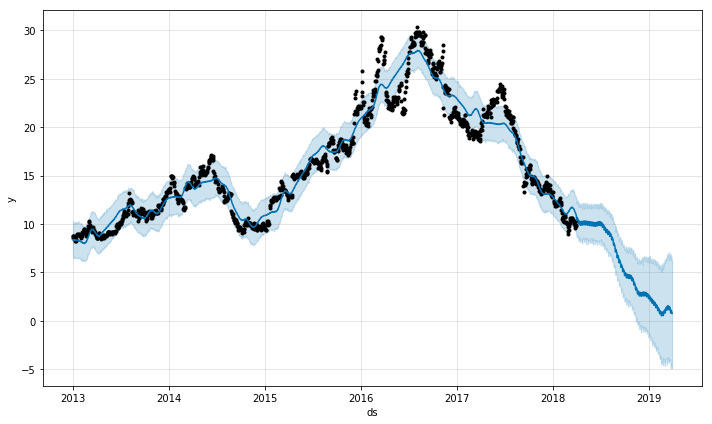

In [12]:
fig1= m.plot(forecast)

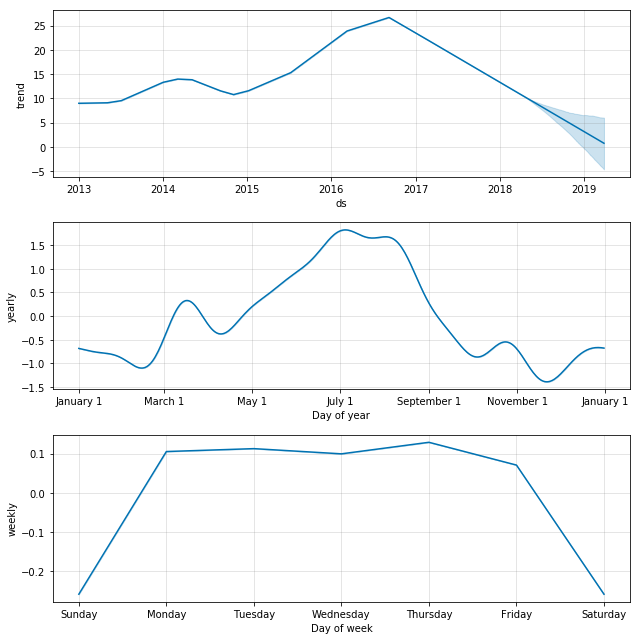

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
df_cv = cross_validation(m, horizon = '365 days')
df_cv.tail()

INFO:fbprophet.diagnostics:Making 3 forecasts with cutoffs between 2016-03-29 00:00:00 and 2017-03-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
752,2018-03-23,13.856388,6.507302,20.374900,9.84,2017-03-29
753,2018-03-26,13.589219,6.005307,20.115205,9.61,2017-03-29
754,2018-03-27,13.506058,6.378692,20.016249,9.76,2017-03-29
755,2018-03-28,13.375197,6.347288,19.863460,9.89,2017-03-29
756,2018-03-29,13.300227,6.118048,19.803580,10.32,2017-03-29


In [15]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
278,35 days 12:00:00,11.650215,3.413241,2.949060,0.127216,0.200000
25,36 days 00:00:00,12.146097,3.485125,3.010883,0.130072,0.200000
529,36 days 00:00:00,12.217679,3.495380,3.038318,0.131388,0.186667
279,36 days 12:00:00,12.278325,3.504044,3.058478,0.132009,0.173333
26,37 days 00:00:00,12.738312,3.569077,3.115281,0.134620,0.173333


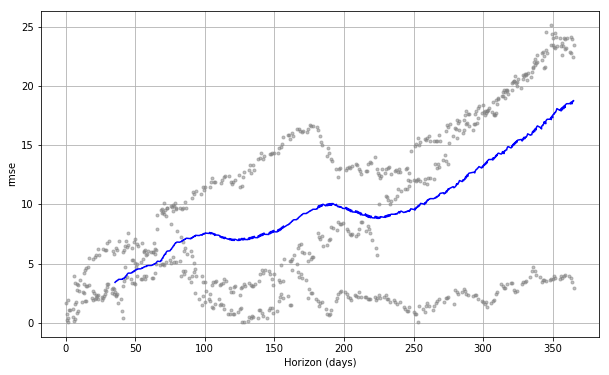

In [16]:
fig3 = plot_cross_validation_metric(df_cv, metric = 'rmse')

In [17]:
import fix_yahoo_finance as yf 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
 aobc = yf.download('AOBC','2013-01-01','2018-10-17')

[*********************100%***********************]  1 of 1 downloaded


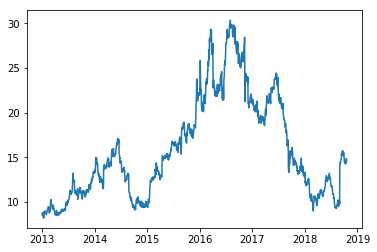

In [19]:
plt.plot(aobc.Close)

Main Takeaway: I can see that FB Prophet can't predict longer-term stock market trends very well. For instance, with the AOBC stock, it saw a negative trend and predicted that it would continue, which it turns out did not happen.

It's also interesting to note that AOBC is beginning to recoup some of its losses from the past year. I'm not an economist or even a day-trader, but I imagine this may have something to do with the fact that, as Parkland recedes further into the past, so too does the debate around gun-control in the US.